In [1]:
import numpy as np
import pandas as pd

# 擬似データの生成
def generate_sensor_data(person_name, noise_level):
    time = np.linspace(0, 20, 1000)  # 20秒間、1000点
    
    # ノイズレベルに応じたデータ生成
    x = np.random.normal(0, noise_level, 1000)
    y = np.random.normal(0, noise_level, 1000)
    z = 9.8 + np.random.normal(0, noise_level * 0.5, 1000)
    
    df = pd.DataFrame({
        'time': time,
        'x': x,
        'y': y,
        'z': z
    })
    
    return df

# 3人分のデータ生成と保存
person_a = generate_sensor_data('Person_A', 0.1)
person_b = generate_sensor_data('Person_B', 0.3)
person_c = generate_sensor_data('Person_C', 0.5)

person_a.to_csv('person_a.csv', index=False)
person_b.to_csv('person_b.csv', index=False)
person_c.to_csv('person_c.csv', index=False)

print("CSVファイルを生成しました")

CSVファイルを生成しました


In [1]:
import pandas as pd

# CSVファイルを読み込む
person_a = pd.read_csv('person_a.csv')
person_b = pd.read_csv('person_b.csv')
person_c = pd.read_csv('person_c.csv')

# データの表示
print("=== Person A ===")
print(person_a.head())
print(f"データ数: {len(person_a)}")

print("\n=== Person B ===")
print(person_b.head())
print(f"データ数: {len(person_b)}")

print("\n=== Person C ===")
print(person_c.head())
print(f"データ数: {len(person_c)}")

=== Person A ===
      time         x         y         z
0  0.00000  0.065496 -0.038276  9.899940
1  0.02002 -0.050976  0.045716  9.762007
2  0.04004 -0.022376  0.038206  9.873565
3  0.06006  0.065922 -0.024127  9.804181
4  0.08008  0.073047 -0.037625  9.728362
データ数: 1000

=== Person B ===
      time         x         y         z
0  0.00000 -0.237549 -0.565639  9.690264
1  0.02002  0.231688 -0.248721  9.786007
2  0.04004  0.505622 -0.030106  9.630599
3  0.06006 -0.010290  0.177736  9.645181
4  0.08008 -0.203618  0.718784  9.844064
データ数: 1000

=== Person C ===
      time         x         y         z
0  0.00000 -0.225995  0.425684  9.980211
1  0.02002 -0.464665 -0.294931  9.775203
2  0.04004  0.236749  0.477656  9.792110
3  0.06006  0.301440 -0.046812  9.504117
4  0.08008 -0.078048  0.033449  9.485332
データ数: 1000


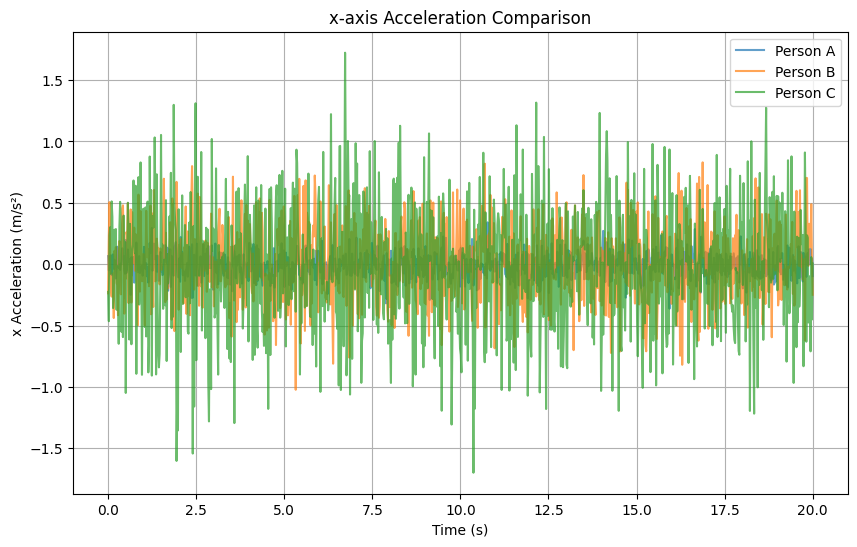

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
person_a = pd.read_csv('person_a.csv')
person_b = pd.read_csv('person_b.csv')
person_c = pd.read_csv('person_c.csv')

# グラフ作成
plt.figure(figsize=(10, 6))

# X軸の加速度を比較
target_data = 'x'

plt.plot(person_a['time'], person_a[target_data], label='Person A', alpha=0.7)
plt.plot(person_b['time'], person_b[target_data], label='Person B', alpha=0.7)
plt.plot(person_c['time'], person_c[target_data], label='Person C', alpha=0.7)

plt.xlabel('Time (s)')
plt.ylabel(target_data + ' Acceleration (m/s²)')
plt.title(target_data + '-axis Acceleration Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [4]:
## 標準偏差を算出するだけのコード

import pandas as pd

# データ読み込み
person_a = pd.read_csv('person_a.csv')
person_b = pd.read_csv('person_b.csv')
person_c = pd.read_csv('person_c.csv')

# Y軸の標準偏差を算出
std_a = person_a['y'].std()
std_b = person_b['y'].std()
std_c = person_c['y'].std()

# 結果表示
print(f"Person A: {std_a:.4f}")
print(f"Person B: {std_b:.4f}")
print(f"Person C: {std_c:.4f}")

Person A: 0.0982
Person B: 0.2950
Person C: 0.4843


/var/folders/jy/h_rhr__15mn045khph171y6w0000gn/T/ipykernel_8147/2359182933.py:18: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(data_to_plot, labels=['Person A', 'Person B', 'Person C'])


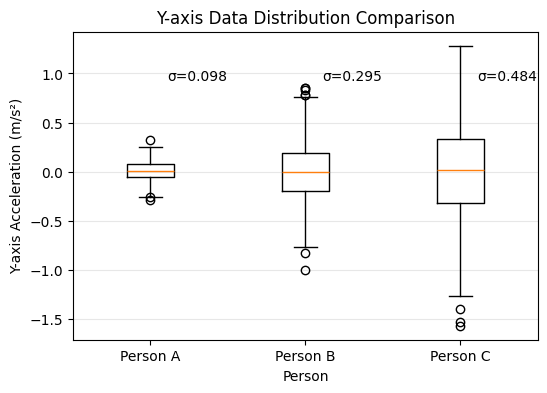

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# データ読み込み
person_a = pd.read_csv('person_a.csv')
person_b = pd.read_csv('person_b.csv')
person_c = pd.read_csv('person_c.csv')

# Y軸データをまとめる
data_to_plot = [
    person_a['y'].values,
    person_b['y'].values,
    person_c['y'].values
]

# Boxplot作成
plt.figure(figsize=(6, 4))
box = plt.boxplot(data_to_plot, labels=['Person A', 'Person B', 'Person C'])

plt.xlabel('Person')
plt.ylabel('Y-axis Acceleration (m/s²)')
plt.title('Y-axis Data Distribution Comparison')
plt.grid(axis='y', alpha=0.3)

# 標準偏差を追加表示
std_values = [person_a['y'].std(), person_b['y'].std(), person_c['y'].std()]
for i, std in enumerate(std_values, 1):
    plt.text(i+0.3, plt.ylim()[1] * 0.65, f'σ={std:.3f}', ha='center')

plt.show()